In [82]:
import os
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')
 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
 
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [83]:
data = pd.read_excel('data6.xlsx')

In [84]:
print('There are %s customers in the dataset' %(len(data)))

There are 22400 customers in the dataset


In [85]:
idsUnique = len(set(data.ClientID))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print ('There are %s duplictes in our dataset'%(idsDupli))

#check two, we expect unique instances in Customer id to be equal to dataset size
print( "There are %s unique ids and the size of the dataset is %d " %(len(data.ClientID.unique()), len(data)))

There are 0 duplictes in our dataset
There are 22400 unique ids and the size of the dataset is 22400 


In [86]:
data.head()

,ClientID,Salary,Total_Debit,Loan_Amount,Industry,Years_employed,Job_position,Property,HR_confirmation,No_of_dependents,Score
0,1,1000000,1500000,2000000,A,5,Senior,M,Yes,0,98.00
1,2,1000000,1500000,2000000,A,5,Senior,M,Yes,0,98.00
2,3,800000,850000,1600000,B,5,Senior,M,Yes,0,78.17
3,4,800000,850000,1600000,B,5,Senior,M,Yes,0,78.17
4,5,600000,650000,1200000,C,5,Senior,M,Yes,0,64.09


Text(0.5, 1.0, 'Correlation Matrix')

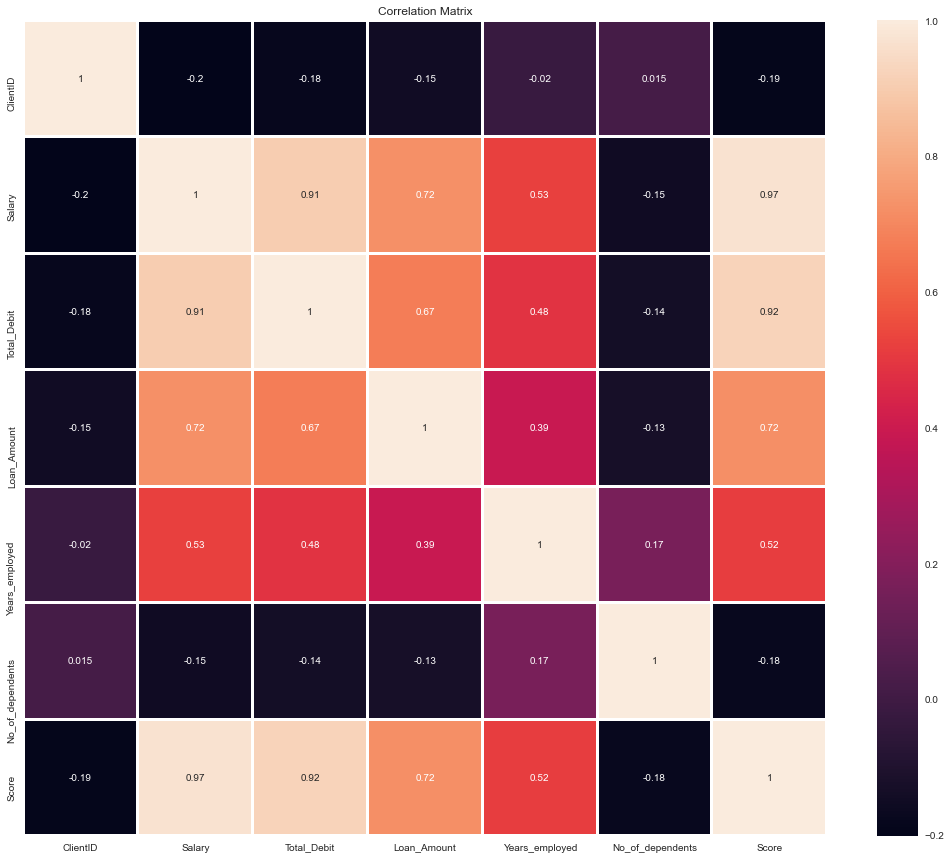

In [87]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

5    12000
4     8400
3     4000
2     2000
1     1600
Name: Years_employed, dtype: int64


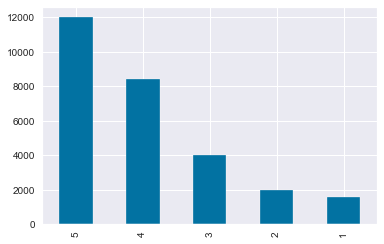

In [33]:
print( data.Years_employed.value_counts())
data.Years_employed.value_counts().plot(kind = 'bar');

A    8800
B    7800
C    5600
D    3800
E    2000
Name: Industry, dtype: int64


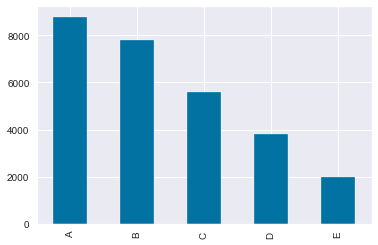

In [34]:
print( data.Industry.value_counts())
data.Industry.value_counts().plot(kind = 'bar');

Senior      13800
Midlevel     7400
Junior       4600
Intern       2200
Name: Job_position, dtype: int64


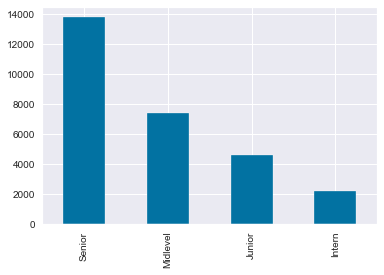

In [35]:
print( data.Job_position.value_counts())
data.Job_position.value_counts().plot(kind = 'bar');

M    11800
N     8200
O     4600
P     3400
Name: Property, dtype: int64


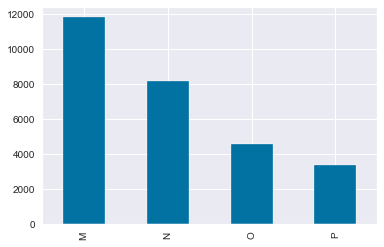

In [36]:
print( data.Property.value_counts())
data.Property.value_counts().plot(kind = 'bar');

Yes    20994
No      7006
Name: HR_confirmation, dtype: int64


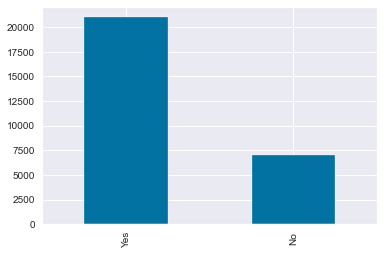

In [37]:
print( data.HR_confirmation.value_counts())
data.HR_confirmation.value_counts().plot(kind = 'bar');

0    10000
1     7000
2     5000
3     3000
4     2000
5     1000
Name: No_of_dependents, dtype: int64


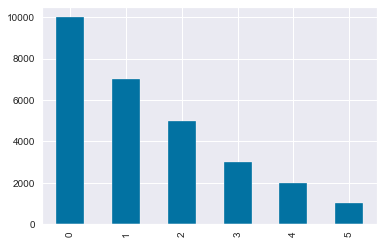

In [38]:
print( data.No_of_dependents.value_counts())
data.No_of_dependents.value_counts().plot(kind = 'bar');

In [88]:
data.describe()

,ClientID,Salary,Total_Debit,Loan_Amount,Years_employed,No_of_dependents,Score
count,22400.000000,22400.000000,2.240000e+04,2.240000e+04,22400.000000,22400.000000,22400.000000
mean,11200.500000,523306.077679,5.903944e+05,8.087946e+05,3.971429,1.392857,52.959534
std,6466.467351,258416.754057,3.100206e+05,5.044645e+05,1.170758,1.422788,20.406790
min,1.000000,48012.000000,4.136600e+04,3.145500e+04,1.000000,0.000000,10.370000
25%,5600.750000,322471.500000,3.515288e+05,4.000000e+05,3.000000,0.000000,35.750000
50%,11200.500000,549975.000000,5.905425e+05,7.000000e+05,4.000000,1.000000,54.700000
75%,16800.250000,719165.500000,7.827018e+05,1.149848e+06,5.000000,2.000000,68.380000
max,22400.000000,1000000.000000,1.500000e+06,2.000000e+06,5.000000,5.000000,99.400000


In [89]:
data.columns

Index(['ClientID', 'Salary', 'Total_Debit', 'Loan_Amount', 'Industry',
       'Years_employed', 'Job_position', 'Property', 'HR_confirmation',
       'No_of_dependents', 'Score'],
      dtype='object')

In [90]:
data=data[['Salary', 'Total_Debit', 'Loan_Amount', 'Industry',
       'Years_employed', 'Job_position', 'Property', 'HR_confirmation',
       'No_of_dependents', 'Score']]

In [91]:
data.columns

Index(['Salary', 'Total_Debit', 'Loan_Amount', 'Industry', 'Years_employed',
       'Job_position', 'Property', 'HR_confirmation', 'No_of_dependents',
       'Score'],
      dtype='object')

In [92]:
data.head()

,Salary,Total_Debit,Loan_Amount,Industry,Years_employed,Job_position,Property,HR_confirmation,No_of_dependents,Score
0,1000000,1500000,2000000,A,5,Senior,M,Yes,0,98.00
1,1000000,1500000,2000000,A,5,Senior,M,Yes,0,98.00
2,800000,850000,1600000,B,5,Senior,M,Yes,0,78.17
3,800000,850000,1600000,B,5,Senior,M,Yes,0,78.17
4,600000,650000,1200000,C,5,Senior,M,Yes,0,64.09


In [152]:
from pycaret.regression import *

In [153]:
data_seen = data.sample(frac=0.80, random_state=780).reset_index(drop=True)
data_unseen = data.drop(data_seen.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (17920, 10)
Unseen Data For Predictions: (4480, 10)


In [154]:
mls = setup(data = data, target = 'Score', session_id=123,
                  normalize = True, transformation = True,
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(22400, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [155]:
best = compare_models(blacklist = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,0.1036,0.3034,0.5206,0.9993,0.0129,0.0025,2.1852
1,Extra Trees Regressor,0.0569,0.3438,0.5556,0.9992,0.0133,0.0015,1.8193
2,Decision Tree,0.0705,0.4690,0.6490,0.9989,0.0160,0.0018,0.0879
3,K Neighbors Regressor,0.1808,0.5206,0.7105,0.9988,0.0167,0.0041,0.1586
4,CatBoost Regressor,0.3117,0.4898,0.6869,0.9988,0.0159,0.0069,5.8044
5,Extreme Gradient Boosting,0.2936,0.5145,0.7009,0.9988,0.0173,0.0067,1.1914
6,Light Gradient Boosting Machine,0.4825,0.8801,0.9313,0.9979,0.0232,0.0112,0.2333
7,Gradient Boosting Regressor,0.8423,1.8866,1.3709,0.9955,0.0335,0.0194,2.4403
8,Support Vector Machine,1.1636,4.6674,2.1590,0.9889,0.0438,0.0227,15.3858
9,Least Angle Regression,1.8124,7.0417,2.6523,0.9832,0.0569,0.0386,0.0224


In [156]:
# Model Training and Validation 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7694,6.7186,2.5920,0.9845,0.0567,0.0388
1,1.7924,6.6920,2.5869,0.9843,0.0573,0.0388
2,1.7140,6.0959,2.4690,0.9854,0.0538,0.0370
3,1.7865,6.8659,2.6203,0.9837,0.0552,0.0379
4,1.8444,7.1518,2.6743,0.9835,0.0563,0.0385
5,1.7551,7.1721,2.6781,0.9825,0.0587,0.0369
6,1.8951,7.5702,2.7514,0.9823,0.0596,0.0410
7,1.8319,7.2304,2.6889,0.9827,0.0576,0.0390
8,1.8607,7.4963,2.7379,0.9817,0.0569,0.0395
9,1.8741,7.4236,2.7246,0.9816,0.0565,0.0388


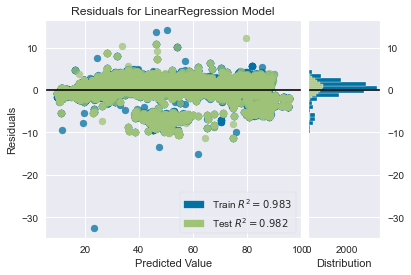

In [157]:
plot_model(lr)

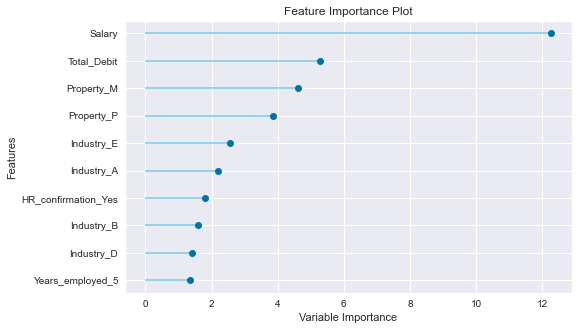

In [158]:
plot_model(lr, plot='feature')

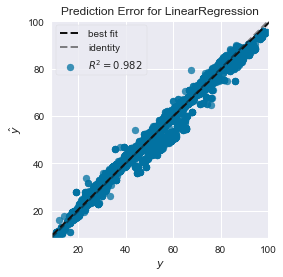

In [159]:
plot_model(lr, plot='error')

In [160]:
bagged_lr = ensemble_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7701,6.7105,2.5905,0.9845,0.0567,0.0389
1,1.7942,6.7004,2.5885,0.9842,0.0575,0.0389
2,1.7159,6.1027,2.4704,0.9854,0.0538,0.0370
3,1.7873,6.8632,2.6198,0.9837,0.0553,0.0380
4,1.8462,7.1507,2.6741,0.9835,0.0564,0.0386
5,1.7592,7.1796,2.6795,0.9825,0.0589,0.0370
6,1.9005,7.5682,2.7510,0.9823,0.0597,0.0411
7,1.8370,7.2257,2.6881,0.9827,0.0577,0.0391
8,1.8632,7.4900,2.7368,0.9817,0.0570,0.0396
9,1.8774,7.4178,2.7236,0.9816,0.0566,0.0389


In [161]:
unseen_predictions = predict_model(bagged_lr, data=data_unseen)
unseen_predictions.head()

,Salary,Total_Debit,Loan_Amount,Industry,Years_employed,Job_position,Property,HR_confirmation,No_of_dependents,Score,Label
0,647695,737268,750239,D,5,Senior,O,Yes,2,55.60,58.8947
1,651133,726292,753855,D,5,Senior,M,Yes,3,63.75,63.8524
2,639355,729767,750504,D,5,Senior,P,Yes,3,52.50,54.9004
3,649087,737821,754193,D,5,Senior,M,Yes,4,61.40,63.6926
4,660717,733454,753941,D,5,Senior,O,Yes,5,57.55,59.4047


In [163]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Score, unseen_predictions.Label, 'R2')

0.9655

In [164]:
data1 = pd.read_excel('test9.xlsx')

In [165]:
data1.head()

,Salary,Total_Debit,Loan_Amount,Industry,Years_employed,Job_position,Property,HR_confirmation,No_of_dependents,Score
0,1000000,951570,992215,A,5,Senior,M,Yes,0,94.6
1,1000000,970366,995633,A,5,Senior,M,Yes,0,94.6
2,1000000,980607,990237,A,5,Senior,N,Yes,0,89.6
3,1000000,991636,992445,A,5,Senior,O,Yes,0,88.6
4,1000000,996914,982418,A,5,Senior,P,Yes,0,85.6


In [169]:
data2 = predict_model(bagged_lr, data=data1)
data2.head(20)

,Salary,Total_Debit,Loan_Amount,Industry,Years_employed,Job_position,Property,HR_confirmation,No_of_dependents,Score,Label
0,1000000,951570,992215,A,5,Senior,M,Yes,0,94.60,88.1573
1,1000000,970366,995633,A,5,Senior,M,Yes,0,94.60,88.4264
2,1000000,980607,990237,A,5,Senior,N,Yes,0,89.60,83.8168
3,1000000,991636,992445,A,5,Senior,O,Yes,0,88.60,83.5684
4,1000000,996914,982418,A,5,Senior,P,Yes,0,85.60,80.3485
5,1000000,952971,987152,A,5,Senior,M,No,0,92.60,86.3573
6,808455,1267046,1777813,A,5,Senior,O,Yes,1,75.94,78.3292
7,817029,1168165,1719117,A,5,Senior,M,No,1,79.94,80.7580
8,800118,1223283,1770549,A,5,Senior,N,No,1,74.94,75.9485
9,914170,1186051,1752463,A,5,Senior,M,No,2,84.24,85.4126


In [167]:
from pycaret.utils import check_metric
check_metric(data2.Score, data2.Label, 'R2')

0.9391

In [168]:
save_model(bagged_lr,'Final_modelx')


Transformation Pipeline and Model Succesfully Saved


In [170]:
from pycaret.utils import version
version()

2.0


In [171]:
from platform import python_version

print(python_version())

3.8.3


In [172]:
import flask
flask.__version__

'1.1.2'

In [175]:
import jinja2
jinja2.__version__

'2.11.2'

In [177]:
import gunicorn
gunicorn.__version__

'20.0.4'

In [178]:
import certifi
certifi.__version__

'2020.06.20'

In [180]:
import itsdangerous
itsdangerous.__version__

'1.1.0'

In [184]:
import pickle 
print(pickle.format_version)

4.0
